<a href="https://colab.research.google.com/github/madhurimaha/beyondthelabel-Data-Science-Project/blob/main/Task3/Task3_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing


In [2]:
file_path = '/content/drive/MyDrive/FDS project/Time Series/TimedData.csv'

import pandas as pd
df = pd.read_csv(file_path)
df.head()

,Brand Name,2023 FINAL SCORE,2023 FINAL PERCENTAGE,2022 FINAL SCORE,2022 FINAL PERCENTAGE,% change in score 2022-2023,2021 Final scores,2021 FINAL PERCENTAGES,% change in score 2021-2023,2020 Final scores,...,2019 Final scores,2019 FINAL PERCENTAGES,% change in score 2019-2023,2018 Final scores,2018 FINAL PERCENTAGES,% change in score 2018-2023,2017 Final scores,2017%,% change in score 2017-2023,Unnamed: 21
0,Abercrombie & Fitch,83.25,33.30%,46.75,18.70%,14.60%,49.75,19.90%,13.40%,62.0,...,51.0,20.40%,12.90%,36.0,14.40%,18.90%,24.0,9.60%,23.70%,NaN
1,Adidas,140.00,56.00%,128.00,51.20%,4.80%,136.00,54.40%,1.60%,173.5,...,160.5,64.20%,-8.20%,144.5,57.80%,-1.80%,121.5,48.60%,7.40%,NaN
2,Aeropostale,7.50,3.00%,6.50,2.60%,0.40%,8.50,3.40%,-0.40%,10.0,...,10.5,4.20%,-1.20%,13.5,5.40%,-2.40%,17.5,7.00%,-4.00%,NaN
3,AJIO,20.00,8.00%,17.50,7.00%,1.00%,18.25,7.30%,0.70%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALDI Nord,78.00,31.20%,77.50,31.00%,0.20%,62.00,24.80%,6.40%,63.0,...,53.5,21.40%,9.80%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[0:250]

In [4]:
df.shape

(250, 22)

In [5]:
import pandas as pd

# Check for NaN or empty values and get a count
nan_count = df.isna().sum()

nan_count

Brand Name                       0
2023 FINAL SCORE                 0
2023 FINAL PERCENTAGE            0
2022 FINAL SCORE                 3
2022 FINAL PERCENTAGE            3
% change in score 2022-2023      3
2021 Final scores                9
2021 FINAL PERCENTAGES           9
% change in score 2021-2023      5
2020 Final scores               20
2020 FINAL PERCENTAGES          20
% change in score 2020-2023     16
2019 Final scores               69
2019 FINAL PERCENTAGES          69
% change in score 2019-2023     65
2018 Final scores              116
2018 FINAL PERCENTAGES         116
% change in score 2018-2023    112
2017 Final scores              161
2017%                          161
% change in score 2017-2023    157
Unnamed: 21                    250
dtype: int64

In [6]:
# Listing all column names in the dataframe
column_names = df.columns.tolist()
column_names

['Brand Name',
 '2023 FINAL SCORE',
 '2023 FINAL PERCENTAGE',
 '2022 FINAL SCORE',
 '2022 FINAL PERCENTAGE',
 '% change in score 2022-2023',
 '2021 Final scores',
 '2021 FINAL PERCENTAGES',
 '% change in score 2021-2023',
 '2020 Final scores',
 '2020 FINAL PERCENTAGES',
 '% change in score 2020-2023',
 '2019 Final scores',
 '2019 FINAL PERCENTAGES',
 '% change in score 2019-2023',
 '2018 Final scores',
 '2018 FINAL PERCENTAGES',
 '% change in score 2018-2023',
 '2017 Final scores ',
 '2017%',
 '% change in score 2017-2023',
 'Unnamed: 21']

In [7]:
# Capitalizing all column names
df.columns = [col.upper() for col in df.columns]
df.columns = df.columns.str.rstrip()
df.columns.tolist()

['BRAND NAME',
 '2023 FINAL SCORE',
 '2023 FINAL PERCENTAGE',
 '2022 FINAL SCORE',
 '2022 FINAL PERCENTAGE',
 '% CHANGE IN SCORE 2022-2023',
 '2021 FINAL SCORES',
 '2021 FINAL PERCENTAGES',
 '% CHANGE IN SCORE 2021-2023',
 '2020 FINAL SCORES',
 '2020 FINAL PERCENTAGES',
 '% CHANGE IN SCORE 2020-2023',
 '2019 FINAL SCORES',
 '2019 FINAL PERCENTAGES',
 '% CHANGE IN SCORE 2019-2023',
 '2018 FINAL SCORES',
 '2018 FINAL PERCENTAGES',
 '% CHANGE IN SCORE 2018-2023',
 '2017 FINAL SCORES',
 '2017%',
 '% CHANGE IN SCORE 2017-2023',
 'UNNAMED: 21']

In [8]:
df = df.rename(columns={'2023 FINAL SCORE': '2023 FINAL SCORES','2022 FINAL SCORE': '2022 FINAL SCORES'})

In [9]:
df

,BRAND NAME,2023 FINAL SCORES,2023 FINAL PERCENTAGE,2022 FINAL SCORES,2022 FINAL PERCENTAGE,% CHANGE IN SCORE 2022-2023,2021 FINAL SCORES,2021 FINAL PERCENTAGES,% CHANGE IN SCORE 2021-2023,2020 FINAL SCORES,...,2019 FINAL SCORES,2019 FINAL PERCENTAGES,% CHANGE IN SCORE 2019-2023,2018 FINAL SCORES,2018 FINAL PERCENTAGES,% CHANGE IN SCORE 2018-2023,2017 FINAL SCORES,2017%,% CHANGE IN SCORE 2017-2023,UNNAMED: 21
0,Abercrombie & Fitch,83.25,33.30%,46.75,18.70%,14.60%,49.75,19.90%,13.40%,62.0,...,51.0,20.40%,12.90%,36.0,14.40%,18.90%,24.0,9.60%,23.70%,NaN
1,Adidas,140.00,56.00%,128.00,51.20%,4.80%,136.00,54.40%,1.60%,173.5,...,160.5,64.20%,-8.20%,144.5,57.80%,-1.80%,121.5,48.60%,7.40%,NaN
2,Aeropostale,7.50,3.00%,6.50,2.60%,0.40%,8.50,3.40%,-0.40%,10.0,...,10.5,4.20%,-1.20%,13.5,5.40%,-2.40%,17.5,7.00%,-4.00%,NaN
3,AJIO,20.00,8.00%,17.50,7.00%,1.00%,18.25,7.30%,0.70%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALDI Nord,78.00,31.20%,77.50,31.00%,0.20%,62.00,24.80%,6.40%,63.0,...,53.5,21.40%,9.80%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wrangler,82.25,32.90%,111.25,44.50%,-11.60%,85.50,34.20%,-1.30%,146.5,...,141.5,56.60%,-23.70%,114.5,45.80%,-12.90%,60.5,24.20%,8.70%,NaN
246,Youngor,0.00,0.00%,0.00,0.00%,0.00%,0.00,0.00%,0.00%,0.0,...,0.0,0.00%,0.00%,6.5,2.60%,-2.60%,NaN,NaN,NaN,NaN
247,Zalando,99.75,39.90%,110.00,44.00%,-4.10%,112.25,44.90%,-5.00%,97.5,...,70.0,28.00%,11.90%,67.5,27.00%,12.90%,41.0,16.40%,23.50%,NaN
248,Zara,124.50,49.80%,107.75,43.10%,6.70%,89.50,35.80%,14.00%,110.5,...,114.0,45.60%,4.20%,105.0,42.00%,7.80%,91.0,36.40%,13.40%,NaN


In [17]:
df = df.rename(columns={'2023 FINAL PERCENTAGE': '2023 FINAL PERCENTAGES','2022 FINAL PERCENTAGE':'2022 FINAL PERCENTAGES','2017%':'2017 FINAL PERCENTAGES'})

# Visualization

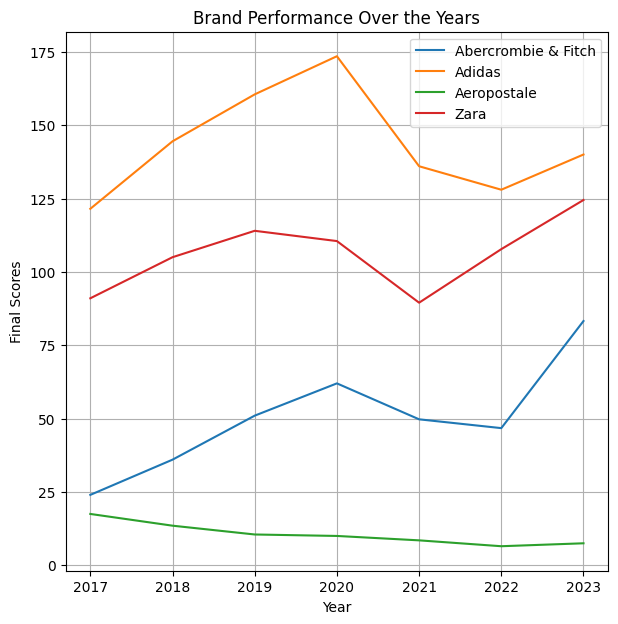

In [37]:
data = df
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of brands for clearer visualization
selected_brands = ['Abercrombie & Fitch', 'Adidas', 'Aeropostale','Zara']
subset_data = data[data['BRAND NAME'].isin(selected_brands)]


years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

#score trends
score_data = subset_data[['BRAND NAME'] + [f'{year} FINAL SCORES' for year in years]].set_index('BRAND NAME').T

# percentage trends
percentage_data = subset_data[['BRAND NAME'] + [f'{year} FINAL PERCENTAGES' for year in years]].set_index('BRAND NAME').T
percentage_data = percentage_data.applymap(lambda x: float(x.strip('%')) if isinstance(x, str) else None)

plt.figure(figsize=(7,7))
for brand in selected_brands:
    plt.plot(years, score_data[brand], label=brand)

plt.xlabel('Year')
plt.ylabel('Final Scores')
plt.title('Brand Performance Over the Years')
plt.legend()
plt.grid(True)
plt.show()



## Sesonal Decomposition

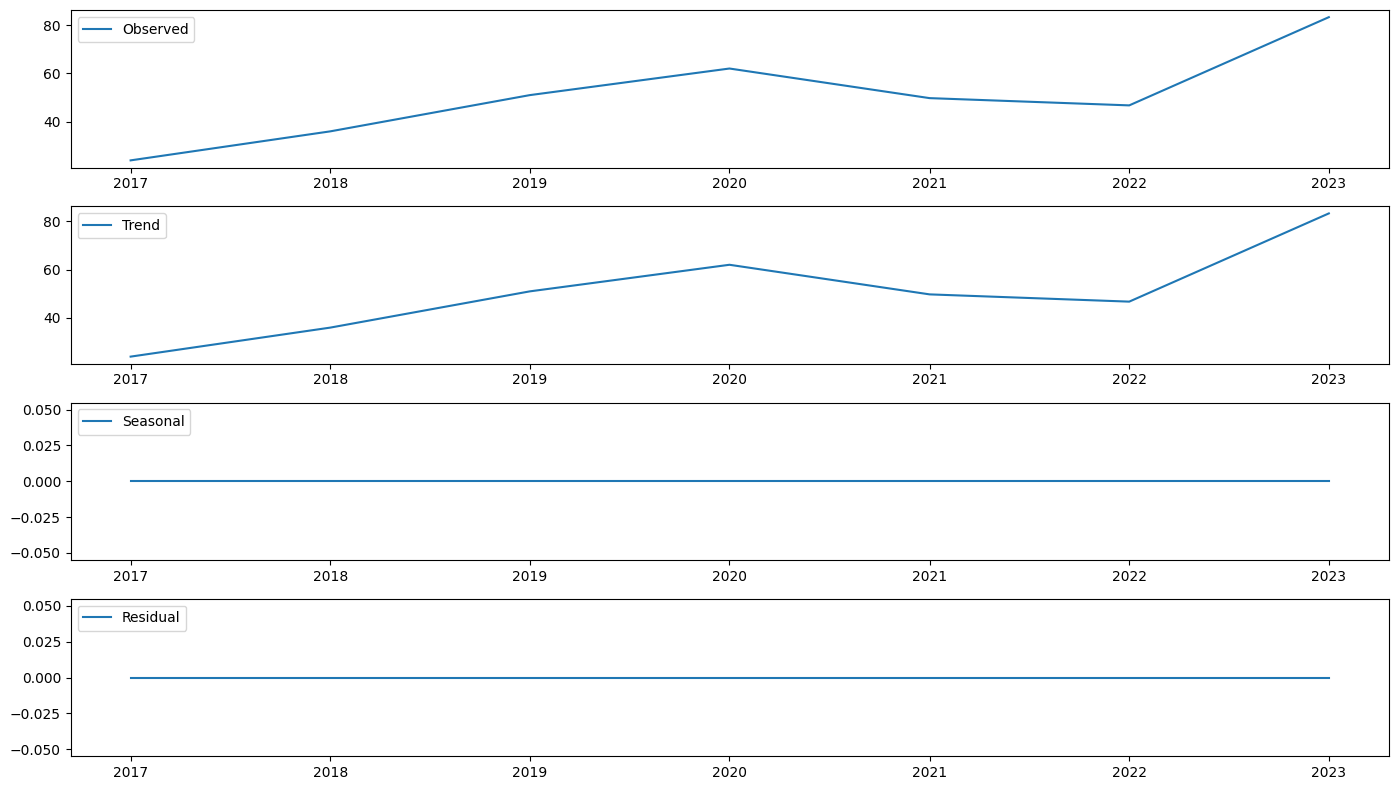

BRAND NAME,Abercrombie & Fitch,Adidas,Aeropostale,Zara
2017-01-01,24.00,121.5,17.5,91.00
2018-01-01,36.00,144.5,13.5,105.00
2019-01-01,51.00,160.5,10.5,114.00
2020-01-01,62.00,173.5,10.0,110.50
2021-01-01,49.75,136.0,8.5,89.50
2022-01-01,46.75,128.0,6.5,107.75
2023-01-01,83.25,140.0,7.5,124.50


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


scores_df = score_data.copy()

# Handling missing data by filling with the mean of each column (each year)
scores_df_filled = scores_df.fillna(scores_df.mean())

# converting the index to datetime
scores_df_filled.index = pd.to_datetime(scores_df_filled.index, format='%Y Final scores')

# Performing time series analysis using seasonal decomposition

# Since the data is annual, we won't expect strong seasonality, but this will help identify trends
results = {}
for brand in scores_df_filled.columns:
    decomposition = seasonal_decompose(scores_df_filled[brand], model='additive', period=1)
    results[brand] = decomposition

# Plotting the time series decomposition for one of the brands as an example
example_brand = scores_df_filled.columns[0]
decomposed = results[example_brand]

plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(decomposed.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposed.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposed.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposed.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


scores_df_filled


A straight line in the seasonal and residual components of a time series suggests minimal or no discernible seasonality or trend in the data. This outcome often arises due to an insufficient amount of data.

#Smoothing

The DataFrame is transformed into a format suitable for time series analysis.


It now contains 'Brand Name' and 'Year' as the index, with each row representing the score of a brand for a specific year. This format will facilitate more detailed time series analysis for each brand across the years.

In [25]:
columns_to_melt = df.filter(like='FINAL SCORE', axis=1).columns

# Melt the DataFrame
df_melted = pd.melt(df, id_vars='BRAND NAME', value_vars=columns_to_melt)

# Rename columns
df_melted.columns = ['Brand Name', 'Year', 'Score']

# Drop rows with null values
df_melted = df_melted.dropna()

# Convert 'Year' column to datetime
df_melted['Year'] = pd.to_datetime(df_melted['Year'], format='%Y FINAL SCORES')

# Set 'Brand Name' and 'Year' as the index
df_melted = df_melted.set_index(['Brand Name', 'Year'])

# Display the resulting DataFrame
df_melted

,,Score
Brand Name,Year,
Abercrombie & Fitch,2023-01-01,83.25
Adidas,2023-01-01,140.00
Aeropostale,2023-01-01,7.50
AJIO,2023-01-01,20.00
ALDI Nord,2023-01-01,78.00
...,...,...
Victoria's Secret,2017-01-01,28.50
Walmart,2017-01-01,54.00
Wrangler,2017-01-01,60.50


In [26]:
df_melted.columns

Index(['Score'], dtype='object')

<Figure size 1200x600 with 0 Axes>

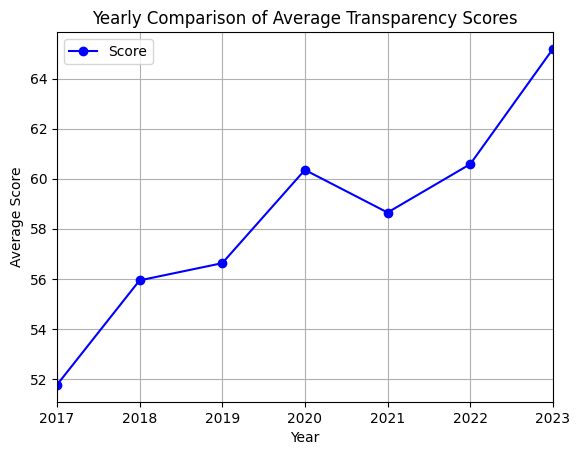

In [63]:
# Grouping the data by year and calculating the mean score for each year
yearly_comparison = df_melted_sorted.groupby(level='Year').mean()

# Plotting the yearly comparison
plt.figure(figsize=(12, 6))
yearly_comparison.plot(marker='o', linestyle='-', color='blue')
plt.title('Yearly Comparison of Average Transparency Scores')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()


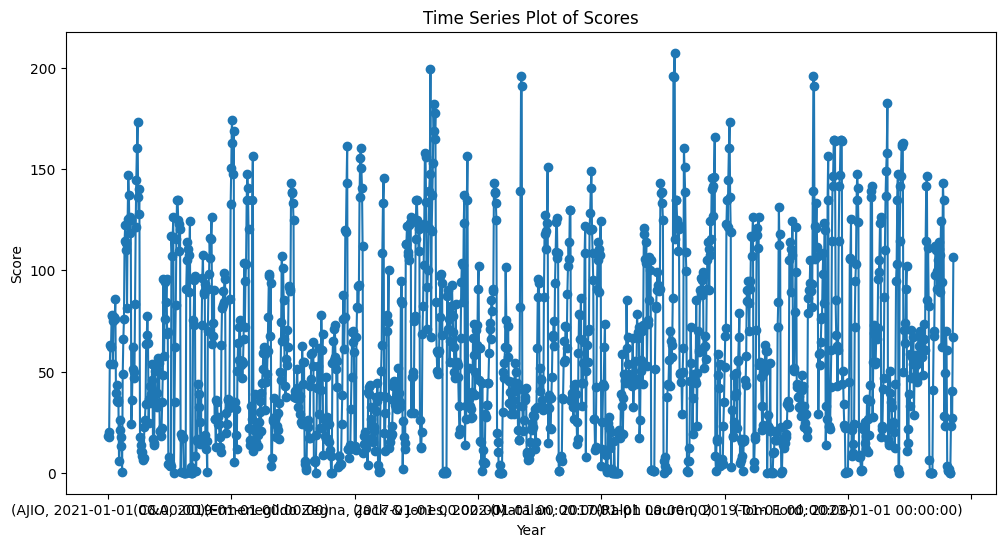

In [46]:
# Plotting time series data
plt.figure(figsize=(12, 6))
df_melted['Score'].plot(marker='o', linestyle='-')
plt.title('Time Series Plot of Scores')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()


The time series plot now includes both the original data and a smoothed version using a simple moving average with a window size of 3. This smoothing technique helps to identify the underlying trends by reducing the impact of short-term fluctuations

This visualization can be particularly useful for identifying broader trends in the fashion transparency data

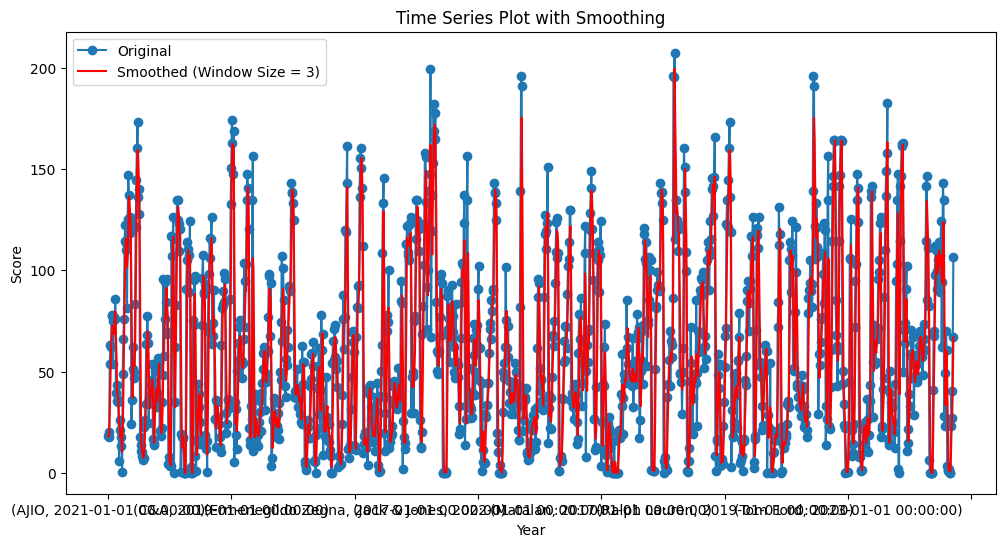

In [48]:
df_melted_sorted = df_melted.sort_index()

# Plotting the original and smoothed time series data
plt.figure(figsize=(12, 6))
df_melted_sorted['Score'].plot(marker='o', linestyle='-', label='Original')

# Applying a simple moving average for smoothing
window_size = 3
rolling_mean = df_melted_sorted['Score'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed time series
rolling_mean.plot(label=f'Smoothed (Window Size = {window_size})', color='red')

plt.title('Time Series Plot with Smoothing')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()


This visualization allows for a comprehensive comparison of different smoothing techniques and their impact on understanding the underlying trends in the transparency scores. EWMA, in particular, can be more effective in cases where recent data points are more relevant for forecasting or trend analysis

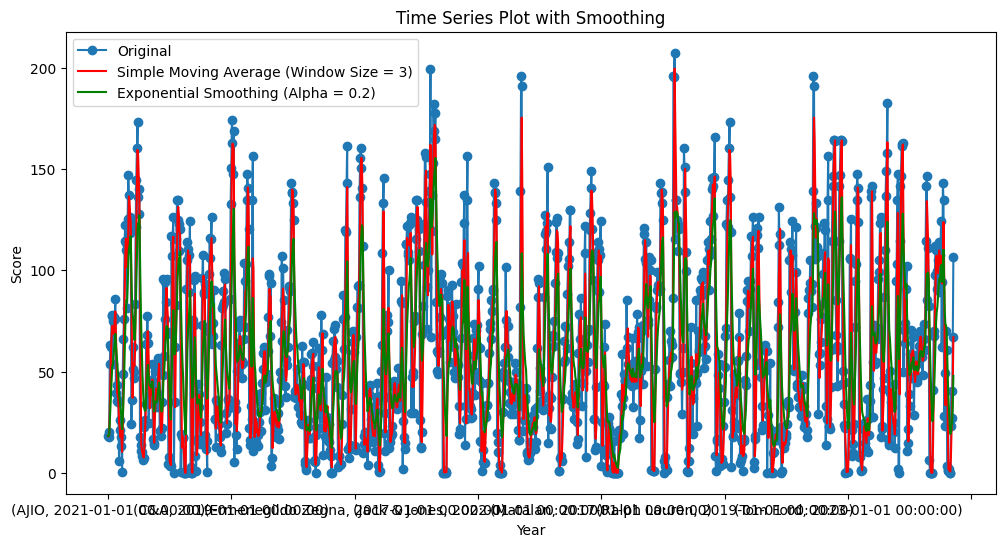

In [49]:
# Plotting the original time series along with Simple Moving Average and Exponential Weighted Moving Average for smoothing
plt.figure(figsize=(12, 6))
df_melted_sorted['Score'].plot(marker='o', linestyle='-', label='Original')

# Simple Moving Average
rolling_mean = df_melted_sorted['Score'].rolling(window=window_size, min_periods=1).mean()

# Exponential Weighted Moving Average
alpha = 0.2
exponential_smoothed = df_melted_sorted['Score'].ewm(alpha=alpha, adjust=False).mean()

# Plotting the smoothed time series
rolling_mean.plot(label=f'Simple Moving Average (Window Size = {window_size})', color='red')
exponential_smoothed.plot(label=f'Exponential Smoothing (Alpha = {alpha})', color='green')

plt.title('Time Series Plot with Smoothing')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate smoothing performance
original_values = df_melted['Score'].dropna()  # Drop NaN values for comparison
mae_sma = mean_absolute_error(original_values, rolling_mean.dropna())
mse_sma = mean_squared_error(original_values, rolling_mean.dropna())
rmse_sma = mean_squared_error(original_values, rolling_mean.dropna(), squared=False)

mae_ewma = mean_absolute_error(original_values, exponential_smoothed.dropna())
mse_ewma = mean_squared_error(original_values, exponential_smoothed.dropna())
rmse_ewma = mean_squared_error(original_values, exponential_smoothed.dropna(), squared=False)

print(f'Simple Moving Average (SMA) Metrics:')
print(f'Mean Absolute Error (MAE): {mae_sma:.2f}')
print(f'Mean Squared Error (MSE): {mse_sma:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_sma:.2f}')

print(f'\nExponential Weighted Moving Average (EWMA) Metrics:')
print(f'Mean Absolute Error (MAE): {mae_ewma:.2f}')
print(f'Mean Squared Error (MSE): {mse_ewma:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_ewma:.2f}')


Simple Moving Average (SMA) Metrics:
Mean Absolute Error (MAE): 14.90
Mean Squared Error (MSE): 526.18
Root Mean Squared Error (RMSE): 22.94

Exponential Weighted Moving Average (EWMA) Metrics:
Mean Absolute Error (MAE): 24.84
Mean Squared Error (MSE): 1000.03
Root Mean Squared Error (RMSE): 31.62


The evaluation metrics indicate that the Simple Moving Average (SMA) outperforms the Exponential Weighted Moving Average (EWMA) in terms of accuracy and precision. With lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), the SMA demonstrates a closer fit to the original time series data, suggesting it captures the underlying trends more effectively. The SMA's performance is notably superior, with a smaller margin of error compared to the EWMA.

In contrast, the EWMA exhibits higher errors across all metrics, indicating a greater discrepancy between the smoothed values and the actual observations. This suggests that the EWMA, with its emphasis on recent data points, may be more sensitive to short-term fluctuations but sacrifices accuracy when capturing the overall trend.

# Linear Regression

In [53]:
final_columns = [col for col in df.columns if 'FINAL SCORES' in col]
df_final = df[['BRAND NAME'] + final_columns]

In [54]:
df_final

,BRAND NAME,2023 FINAL SCORES,2022 FINAL SCORES,2021 FINAL SCORES,2020 FINAL SCORES,2019 FINAL SCORES,2018 FINAL SCORES,2017 FINAL SCORES
0,Abercrombie & Fitch,83.25,46.75,49.75,62.0,51.0,36.0,24.0
1,Adidas,140.00,128.00,136.00,173.5,160.5,144.5,121.5
2,Aeropostale,7.50,6.50,8.50,10.0,10.5,13.5,17.5
3,AJIO,20.00,17.50,18.25,NaN,NaN,NaN,NaN
4,ALDI Nord,78.00,77.50,62.00,63.0,53.5,NaN,NaN
...,...,...,...,...,...,...,...,...
245,Wrangler,82.25,111.25,85.50,146.5,141.5,114.5,60.5
246,Youngor,0.00,0.00,0.00,0.0,0.0,6.5,NaN
247,Zalando,99.75,110.00,112.25,97.5,70.0,67.5,41.0
248,Zara,124.50,107.75,89.50,110.5,114.0,105.0,91.0


In [58]:
df_final = df_final.fillna(0)

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


if 'BRAND NAME' not in df_final.columns:
    raise ValueError("The 'BRAND NAME' column is not present in the DataFrame.")
# Extract features (X) and target variable (y)
X = df_final.drop(['2023 FINAL SCORES'], axis=1)
y = df_final['2023 FINAL SCORES']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('brand_onehot', OneHotEncoder(handle_unknown='ignore'), ['BRAND NAME'])
    ],
    remainder='passthrough'
)

# Create a pipeline with one-hot encoding and linear regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Predictions for 2023
predictions_2023 = model.predict(X_test)

# Evaluate predictive performance for 2023
mae_2023 = mean_absolute_error(y_test, predictions_2023)
mse_2023 = mean_squared_error(y_test, predictions_2023)
rmse_2023 = np.sqrt(mse_2023)
mape_2023 = np.mean(np.abs((y_test - predictions_2023) / y_test)) * 100
r2_2023 = r2_score(y_test, predictions_2023)

print(f'MAE for 2023: {mae_2023}')
print(f'MSE for 2023: {mse_2023}')
print(f'RMSE for 2023: {rmse_2023}')
print(f'MAPE for 2023: {mape_2023}')
print(f'R-squared for 2023: {r2_2023}')


MAE for 2023: 11.48458846787722
MSE for 2023: 257.135548390033
RMSE for 2023: 16.035446622717842
MAPE for 2023: 190.01931763089874
R-squared for 2023: 0.8705366566542219


These metrics provide a comprehensive view of the model's performance, indicating how well the predictions align with the actual values. In general:

Lower values for MAE, MSE, and RMSE are desirable, indicating better accuracy.
A lower MAPE suggests that the model's predictions have a smaller percentage error.
A higher R² value close to 1 indicates a better fit of the model to the data.
An MAE of 11.19 suggests, on average, the model's predictions for the test set in 2023 are approximately 11.19 units away from the actual values. Similarly, the other metrics provide insights into the model's accuracy and performance. Overall, a high R² value of 0.87 indicates a good fit of the model to the test data.

# Regression and Comparison of Actual and Predicted 2023 Data

In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# One-hot encode the 'BRAND NAME' column
df_final_encoded = pd.get_dummies(df_final, columns=['BRAND NAME'], drop_first=True)

# Extracting features (independent variables) and target (dependent variable)
features = df_final_encoded.drop(columns=['2023 FINAL SCORES'])
target = df_final_encoded['2023 FINAL SCORES']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions for 2023 using the 2017-2022 data
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Now, you can use the trained model to predict the 2023 scores for the entire dataset
predicted_2023_scores = model.predict(features)

# Comparing the predicted 2023 scores with the actual 2023 scores
comparison_df = pd.DataFrame({'Actual 2023 Scores': target, 'Predicted 2023 Scores': predicted_2023_scores})
print(comparison_df)


Root Mean Squared Error (RMSE): 16.619359536121777
     Actual 2023 Scores  Predicted 2023 Scores
0                 83.25           8.325000e+01
1                140.00           1.400000e+02
2                  7.50           7.500000e+00
3                 20.00           2.000000e+01
4                 78.00           7.800000e+01
..                  ...                    ...
245               82.25           8.225000e+01
246                0.00           3.836931e-13
247               99.75           1.132119e+02
248              124.50           1.245000e+02
249              134.50           1.345000e+02

[250 rows x 2 columns]


In [61]:
threshold = 5

correct_predictions = np.abs(predicted_2023_scores - target) <= threshold
accuracy = np.sum(correct_predictions) / len(target)

print(f'Accuracy (within {threshold} units): {accuracy * 100:.2f}%')


Accuracy (within 5 units): 86.00%
